# Implementation Princial Component Analysis

### Author: Sunwoo Choi

### Data
fashion_mnist from keras.datasets

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

train_data, test_data = fashion_mnist.load_data()


In [ ]:
test_x = np.array(test_data[0])
test_label = np.array(test_data[1])

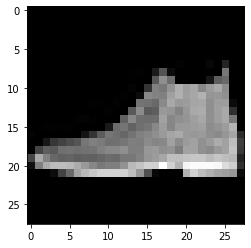

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(test_x[0], interpolation='nearest')


In [ ]:
test_label.shape

(10000,)

In [ ]:

# for each label value, extract 500 rows.
rows = np.where(test_label[:] == 0)
matched_x = test_x[rows]
x = matched_x[:500,:,:]
matched_y = test_label[rows]
y = matched_y[:500,]

for label in range(1,10):
  rows = np.where(test_label[:] == label)
  matched_x = test_x[rows]
  matched_y = test_label[rows]
  x = np.vstack((x,matched_x[:500,:,:]))
  y = np.hstack((y,matched_y[:500,]))


sample_size = x.shape[0]
dim = x.shape[1]*x.shape[2]

x= x.reshape((sample_size, dim))
print(x.shape)

print(y.shape)

(5000, 784)
(5000,)


In [ ]:
from sklearn.decomposition import PCA

#PCA model that explaines 80% of variances
fashion_pca = PCA(n_components=0.8)
fashion_pca.fit(x)



PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(sum(fashion_pca.explained_variance_ratio_))
print("The number of components to explain 80% of variances: ", len(fashion_pca.explained_variance_ratio_))

0.8009035391207394
The number of components to explain 80% of variances:  24


<Figure size 432x288 with 0 Axes>

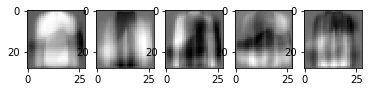

In [ ]:
# plot top 5 compoenets that explains variances as images
plt.figure()
f, axarr = plt.subplots(1,5) 
for i in range(5):
  axarr[i].imshow(fashion_pca.components_[i].reshape(28, 28), interpolation='nearest')

I can see some combining images of pants and t-shirts.

In [ ]:
np.random.seed(1337)
rand_idx = np.random.choice(x.shape[0], 3, replace=False)
sample_x = x[rand_idx]

I

In [ ]:

sample_to_dim = fashion_pca.transform(sample_x)
com_vec = fashion_pca.components_

print(sample_to_dim.shape)
print(com_vec.shape)

pic_dspace = np.matmul(sample_to_dim, com_vec)


(3, 24)
(24, 784)


eigen faces = $ XP $


$ x = n \times dimension \space $
$ P = dimension \times compoenets$

<Figure size 432x288 with 0 Axes>

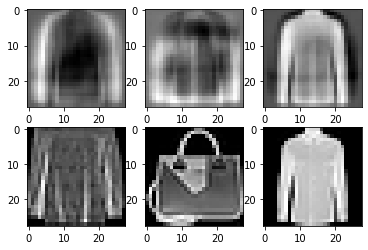

In [ ]:
plt.figure()
f, axarr = plt.subplots(2,3) 
for i in range(3):
  axarr[0][i].imshow(pic_dspace[i].reshape(28, 28), interpolation='nearest')
  axarr[1][i].imshow(sample_x[i].reshape(28, 28), interpolation='nearest')

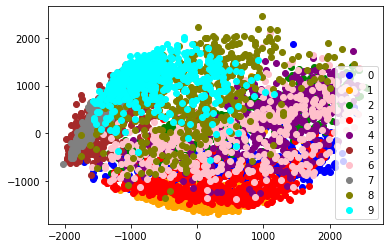

In [ ]:
#cm = np.array(['blue', 'oragne','green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

cm = {0:'blue', 1:'orange', 2:'green', 3:'red', 4:'purple', 5:'brown', 6:'pink', 7:'gray', 8:'olive', 9:'cyan'}

x_to_dim = fashion_pca.transform(x)[:,:2]

fig, ax = plt.subplots()
for label in np.unique(y):
    row = np.where(y == label)
    ax.scatter(x_to_dim[row,0], x_to_dim[row,1], c = cm[label], label = label)
ax.legend()
plt.show()


It is hard to figure out the groups without the colors.

In [ ]:
from sklearn.manifold import TSNE

fashion_tsne = TSNE(n_components=2).fit_transform(x)
fashion_tsne.shape

(5000, 2)

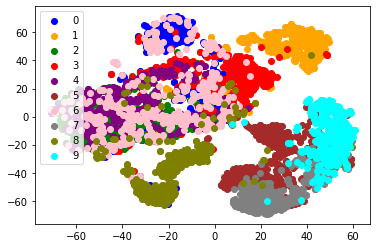

In [ ]:
fig, ax = plt.subplots()
for label in np.unique(y):
    row = np.where(y == label)
    ax.scatter(fashion_tsne[row,0], fashion_tsne[row,1], c = cm[label], label = label)
ax.legend()
plt.show()

It much better to see the clusters. It is more informative to check the clusters. 